In [8]:
!conda install nltk -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/rhaggerty/anaconda2/envs/py36-test:

The following NEW packages will be INSTALLED:

    nltk:     3.2.4-py36_0 
    requests: 2.14.2-py36_0

requests-2.14. 100% |################################| Time: 0:00:00   6.16 MB/s
nltk-3.2.4-py3 100% |################################| Time: 0:00:00  11.90 MB/s       | Time: 0:00:00  11.74 MB/spy3  82% |##########################      | Time: 0:00:00  12.60 MB/s


In [34]:
!conda install pandas -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/rhaggerty/anaconda2/envs/py36-test:

The following NEW packages will be INSTALLED:

    mkl:    2017.0.3-0   
    numpy:  1.13.1-py36_0
    pandas: 0.20.3-py36_0
    pytz:   2017.2-py36_0

mkl-2017.0.3-0 100% |################################| Time: 0:00:06  17.90 MB/s       | ETA:  0:00:02  21.00 MB/s
numpy-1.13.1-p 100% |################################| Time: 0:00:00  11.95 MB/s       | Time: 0:00:00  17.67 MB/s1-p  44% |##############                  | Time: 0:00:00  12.49 MB/sme: 0:00:00  13.21 MB/s###########################    | Time: 0:00:00  12.55 MB/s
pytz-2017.2-py 100% |################################| Time: 0:00:00  11.52 MB/s
pandas-0.20.3- 100% |################################| Time: 0:00:00  12.45 MB/s       | Time: 0:00:00   8.30 MB/s.3-  16% |#####                           | Time: 0:00:00   9.97 MB/s                   | Time: 0:00:00  10.39 MB

In [39]:
!conda install scikit-learn -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/rhaggerty/anaconda2/envs/py36-test:

The following NEW packages will be INSTALLED:

    scikit-learn: 0.19.0-np113py36_0
    scipy:        0.19.1-np113py36_0

scipy-0.19.1-n 100% |################################| Time: 0:00:01  14.68 MB/s       | ETA:  0:00:00  10.79 MB/s#########    | ETA:  0:00:00  13.87 MB/s
scikit-learn-0 100% |################################| Time: 0:00:00  26.91 MB/s | Time: 0:00:00  32.56 MB/sn-0  29% |#########                       | Time: 0:00:00  29.38 MB/s##################             | Time: 0:00:00  28.45 MB/s################    | Time: 0:00:00  28.19 MB/s


In [74]:
!conda install matplotlib -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/rhaggerty/anaconda2/envs/py36-test:

The following NEW packages will be INSTALLED:

    cycler:     0.10.0-py36_0    
    freetype:   2.5.5-2          
    icu:        54.1-0           
    libpng:     1.6.30-1         
    matplotlib: 2.0.2-np113py36_0
    pyparsing:  2.2.0-py36_0     
    pyqt:       5.6.0-py36_2     
    qt:         5.6.2-2          
    sip:        4.18-py36_0      

icu-54.1-0.tar 100% |################################| Time: 0:00:01   6.43 MB/s       | ETA:  0:00:01   5.50 MB/s
libpng-1.6.30- 100% |################################| Time: 0:00:00  10.27 MB/s
qt-5.6.2-2.tar 100% |################################| Time: 0:00:06  11.15 MB/s       | Time: 0:00:00   9.28 MB/star   2% |                                | Time: 0:00:00  10.07 MB/sme: 0:00:00  10.07 MB/s                               | Time: 0:00:00   9.95 MB/s   9.93 MB/s              

In [43]:
import os
import re
import glob
from io import open

from nltk.corpus import stopwords
from nltk import tokenize
import pandas as pd

from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
local_dir = '/Users/rhaggerty/remote/bills/tx/data/'


def summary_dict():
    summary_list = []
    bill_no_list = []
    summary_dict = {}
    for doc_name in glob.glob(local_dir + 'text/*.txt'):
        bill_no = doc_name.split('/')[-1].rstrip('.txt')
        with open(doc_name, 'rt') as in_file:
            full_text = in_file.read()
            sentences_list = tokenize.sent_tokenize(full_text)
            summary_tag = re.compile('A BILL TO BE ENTITLED')
            summary_sentences = list(filter(summary_tag.search, sentences_list))
            for sentence in summary_sentences:
                cleaned_sentence = \
                        re.sub('.*A BILL TO BE ENTITLED AN ACT relating to ', 
                                '', sentence)
        summary_list.append(cleaned_sentence)
        bill_no_list.append(bill_no)
    bill_summaries = list(zip(bill_no_list, summary_list))
    for bill, summary in bill_summaries:
        summary_dict[bill] = summary
    return summary_dict

In [11]:
full_summaries = summary_dict()

In [ ]:
#next steps:
# remove stop words
# remove date words?
# tokenize text
# tokenize AND stem text
# create tdif matrix
# kmeans clusters


# WHY ARE THERE DUPLICATE WORDS IN THE CLUSTER WORD LIST?
#clean/lemmatize?
#add bill names/titles DONE
#change tdif method?
#
#change number of clusters?
#add other types of clustering?
#charts
#clean code

#predict label based on clusters?
#try multilabel classification?

In [17]:
summary_list = list(full_summaries.values())

In [18]:
summary_list[:10]

['avoiding the abolishment of certain agencies subject to the Texas Sunset Act on September 1, 2017.',
 'avoiding the abolishment of certain agencies subject to the Texas Sunset Act on September 1, 2017.',
 'avoiding the abolishment of certain agencies subject to the Texas Sunset Act on September 1, 2017.',
 'the repeal of certain riders for the Texas Medical Board and the Texas State Board of Examiners of Psychologists from the General Appropriations Act that are contingent upon the approval of certain Acts continuing those agencies during the 85th Regular Session.',
 'the repeal of certain riders for the Texas Medical Board and the Texas State Board of Examiners of Psychologists from the General Appropriations Act that are contingent upon the approval of certain Acts continuing those agencies during the 85th Regular Session.',
 'the funding of certain governmental entities subject to abolishment on September 1, 2017.',
 'ad valorem taxation; authorizing fees.',
 'the calculation of t

In [19]:
summary_list[0][:20]

'avoiding the abolish'

In [20]:
summary_list[10][:20]

'municipal annexation'

In [83]:
names_list = list(full_summaries.keys())
names_list

['HB00001E',
 'HB00001H',
 'HB00001I',
 'HB00002E',
 'HB00002H',
 'HB00002I',
 'HB00003I',
 'HB00004H',
 'HB00004I',
 'HB00005I',
 'HB00006I',
 'HB00007E',
 'HB00007F',
 'HB00007I',
 'HB00007S',
 'HB00009E',
 'HB00009H',
 'HB00009I',
 'HB00010E',
 'HB00010H',
 'HB00010I',
 'HB00011E',
 'HB00011H',
 'HB00011I',
 'HB00012I',
 'HB00013E',
 'HB00013F',
 'HB00013H',
 'HB00013I',
 'HB00013S',
 'HB00014H',
 'HB00014I',
 'HB00015H',
 'HB00015I',
 'HB00016H',
 'HB00016I',
 'HB00017H',
 'HB00017I',
 'HB00018H',
 'HB00018I',
 'HB00019H',
 'HB00019I',
 'HB00020E',
 'HB00020H',
 'HB00020I',
 'HB00021E',
 'HB00021F',
 'HB00021H',
 'HB00021I',
 'HB00021S',
 'HB00022H',
 'HB00022I',
 'HB00023E',
 'HB00023H',
 'HB00023I',
 'HB00024H',
 'HB00024I',
 'HB00025E',
 'HB00025H',
 'HB00025I',
 'HB00026E',
 'HB00026H',
 'HB00026I',
 'HB00027E',
 'HB00027H',
 'HB00027I',
 'HB00028E',
 'HB00028H',
 'HB00028I',
 'HB00029I',
 'HB00030E',
 'HB00030F',
 'HB00030H',
 'HB00030I',
 'HB00030S',
 'HB00031I',
 'HB00032E',

## Tokenize and stem summary list

In [21]:

stemmer = SnowballStemmer("english")

In [64]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in tokenize.sent_tokenize(text) for word in tokenize.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in tokenize.sent_tokenize(text) for word in tokenize.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [65]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in summary_list:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [30]:
totalvocab_stemmed

['avoid',
 'the',
 'abolish',
 'of',
 'certain',
 'agenc',
 'subject',
 'to',
 'the',
 'texa',
 'sunset',
 'act',
 'on',
 'septemb',
 'avoid',
 'the',
 'abolish',
 'of',
 'certain',
 'agenc',
 'subject',
 'to',
 'the',
 'texa',
 'sunset',
 'act',
 'on',
 'septemb',
 'avoid',
 'the',
 'abolish',
 'of',
 'certain',
 'agenc',
 'subject',
 'to',
 'the',
 'texa',
 'sunset',
 'act',
 'on',
 'septemb',
 'the',
 'repeal',
 'of',
 'certain',
 'rider',
 'for',
 'the',
 'texa',
 'medic',
 'board',
 'and',
 'the',
 'texa',
 'state',
 'board',
 'of',
 'examin',
 'of',
 'psychologist',
 'from',
 'the',
 'general',
 'appropri',
 'act',
 'that',
 'are',
 'conting',
 'upon',
 'the',
 'approv',
 'of',
 'certain',
 'act',
 'continu',
 'those',
 'agenc',
 'dure',
 'the',
 '85th',
 'regular',
 'session',
 'the',
 'repeal',
 'of',
 'certain',
 'rider',
 'for',
 'the',
 'texa',
 'medic',
 'board',
 'and',
 'the',
 'texa',
 'state',
 'board',
 'of',
 'examin',
 'of',
 'psychologist',
 'from',
 'the',
 'genera

In [66]:
totalvocab_tokenized

['avoiding',
 'the',
 'abolishment',
 'of',
 'certain',
 'agencies',
 'subject',
 'to',
 'the',
 'texas',
 'sunset',
 'act',
 'on',
 'september',
 'avoiding',
 'the',
 'abolishment',
 'of',
 'certain',
 'agencies',
 'subject',
 'to',
 'the',
 'texas',
 'sunset',
 'act',
 'on',
 'september',
 'avoiding',
 'the',
 'abolishment',
 'of',
 'certain',
 'agencies',
 'subject',
 'to',
 'the',
 'texas',
 'sunset',
 'act',
 'on',
 'september',
 'the',
 'repeal',
 'of',
 'certain',
 'riders',
 'for',
 'the',
 'texas',
 'medical',
 'board',
 'and',
 'the',
 'texas',
 'state',
 'board',
 'of',
 'examiners',
 'of',
 'psychologists',
 'from',
 'the',
 'general',
 'appropriations',
 'act',
 'that',
 'are',
 'contingent',
 'upon',
 'the',
 'approval',
 'of',
 'certain',
 'acts',
 'continuing',
 'those',
 'agencies',
 'during',
 'the',
 '85th',
 'regular',
 'session',
 'the',
 'repeal',
 'of',
 'certain',
 'riders',
 'for',
 'the',
 'texas',
 'medical',
 'board',
 'and',
 'the',
 'texas',
 'state',
 'bo

In [68]:

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 8206 items in vocab_frame


In [69]:
vocab_frame.head()

,words
avoid,avoiding
the,the
abolish,abolishment
of,of
certain,certain


In [45]:
#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary_list) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 334 ms, sys: 18.5 ms, total: 352 ms
Wall time: 397 ms
(504, 2)


In [47]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary_list) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 293 ms, sys: 3.23 ms, total: 297 ms
Wall time: 298 ms
(504, 3134)


In [51]:
tfidf_vectorizer = TfidfVectorizer(max_df=.8, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,2))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(summary_list) #fit the vectorizer to synopses

print(tfidf_matrix.shape)

CPU times: user 335 ms, sys: 83.8 ms, total: 419 ms
Wall time: 429 ms
(504, 3134)


In [49]:
terms = tfidf_vectorizer.get_feature_names()

In [50]:
terms

["'s",
 "'s annex",
 "'s bodi",
 "'s crimin",
 "'s health",
 "'s licens",
 "'s registr",
 "'s report",
 "'s resid",
 "'s right",
 "'s territori",
 "'s transcript",
 "'s trial",
 "'s weight",
 '85th',
 '85th regular',
 'abat',
 'abat collect',
 'abat discoveri',
 'abil',
 'abil particip',
 'abolish',
 'abolish certain',
 'abolish septemb',
 'abolit',
 'abolit ad',
 'abolit school',
 'abort',
 'abort complic',
 'abort dismember',
 'abort increas',
 'abort provid',
 'abort servic',
 'abstin',
 'abstin syndrom',
 'abus',
 'abus author',
 'abus neglect',
 'abus servic',
 'acceler',
 'acceler vehicl',
 'accept',
 'accept polit',
 'access',
 'access boundari',
 'access zone',
 'account',
 'account issu',
 'account program',
 'account rate',
 'account water',
 'accru',
 'accru connect',
 'achiev',
 'achiev equal',
 'acquisit',
 'acquisit properti',
 'act',
 'act commit',
 'act conting',
 'act continu',
 'act fund',
 'act physician',
 'act septemb',
 'action',
 'action reduc',
 'action retail',

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
print(dist)

[[ -4.44089210e-16  -4.44089210e-16  -4.44089210e-16 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [ -4.44089210e-16  -4.44089210e-16  -4.44089210e-16 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [ -4.44089210e-16  -4.44089210e-16  -4.44089210e-16 ...,   1.00000000e+00
    1.00000000e+00   1.00000000e+00]
 ..., 
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   0.00000000e+00
    1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    0.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00 ...,   1.00000000e+00
    1.00000000e+00   0.00000000e+00]]


In [52]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 679 ms, sys: 13.9 ms, total: 693 ms
Wall time: 723 ms


In [53]:
from sklearn.externals import joblib

#uncomment the below lineto save your model 
#since I've already run my model I am loading from the pickle
#
joblib.dump(km,  'doc_cluster.pkl')
#
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [91]:
bills = {'names': names_list, 'synopsis': summary_list, 'cluster': clusters }
frame = pd.DataFrame(bills, index = [clusters] , columns = ['synopsis', 'cluster', 'names'])
frame['cluster'].value_counts()

0    293
3     87
1     85
4     22
2     17
Name: cluster, dtype: int64

In [95]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d names:" % i, end='')
    for synopsis in frame.loc[i]['names'].values.tolist():
        print(' %s,' % synopsis, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'certain', b'criminal', b'authorizing', b'offense', b'penalty', b'voting',

Cluster 0 names: HB00001E, HB00001H, HB00001I, HB00002E, HB00002H, HB00002I, HB00006I, HB00007E, HB00007F, HB00007I, HB00007S, HB00012I, HB00013E, HB00013F, HB00013H, HB00013I, HB00013S, HB00014H, HB00014I, HB00015H, HB00015I, HB00016H, HB00016I, HB00017H, HB00017I, HB00018H, HB00018I, HB00019H, HB00019I, HB00026E, HB00026H, HB00026I, HB00027E, HB00027H, HB00027I, HB00029I, HB00031I, HB00033H, HB00033I, HB00041I, HB00042I, HB00043I, HB00045I, HB00046I, HB00047H, HB00047I, HB00048I, HB00052I, HB00053I, HB00056I, HB00057I, HB00058I, HB00061I, HB00063I, HB00066I, HB00067I, HB00068I, HB00069I, HB00070I, HB00073I, HB00075I, HB00077I, HB00083I, HB00085I, HB00086I, HB00087I, HB00089I, HB00090I, HB00093H, HB00093I, HB00094I, HB00096H, HB00096I, HB00097I, HB00101I, HB00102I, HB00103H, HB00103I, HB00104I, HB00105I, HB00106I, HB00107I, HB00109I, HB00110H, HB00110I, HB00111H, HB001

In [117]:
order_centroids

array([[2547, 2232, 2219, ..., 1961, 1960, 1566],
       [2810, 3012,   73, ..., 1990, 1988, 1566],
       [1695, 1767, 1697, ..., 2085, 2084,    0],
       [ 483, 1363,  795, ..., 2596,  490, 1481]])

In [97]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

# MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
# print()
# print()

In [98]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'criminal, offense, penalty', 
                 1: 'tax, homestead', 
                 2: 'maternal, pregnancy-related, morbidity', 
                 3: 'school, finance, teacher', 
                 4: 'health, benefit, women'}

In [104]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=names_list))

#group by cluster
groups = df.groupby('label')

In [105]:
df.head()

,label,title,x,y
0,0,HB00001E,-0.439774,0.211696
1,0,HB00001H,0.649247,0.188124
2,0,HB00001I,0.649247,0.188124
3,0,HB00002E,-0.467321,0.053335
4,0,HB00002H,-0.467321,0.053335


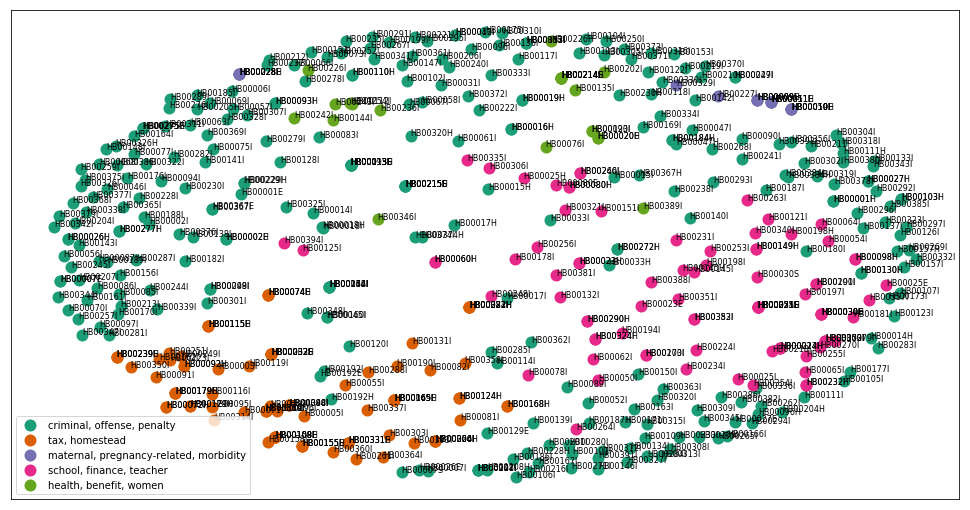

In [108]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

## Tryr 4 clusters instead of 5

In [109]:
num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 663 ms, sys: 7.82 ms, total: 671 ms
Wall time: 695 ms


In [110]:

#uncomment the below lineto save your model 
#since I've already run my model I am loading from the pickle
#
joblib.dump(km,  'doc_cluster.pkl')
#
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [111]:
bills = {'names': names_list, 'synopsis': summary_list, 'cluster': clusters }
frame = pd.DataFrame(bills, index = [clusters] , columns = ['synopsis', 'cluster', 'names'])
frame['cluster'].value_counts()

3    329
0     89
1     70
2     16
Name: cluster, dtype: int64

In [116]:
frame.loc[frame['cluster'] == 3].synopsis.unique()

array([ 'avoiding the abolishment of certain agencies subject to the Texas Sunset Act on September 1, 2017.',
       'the repeal of certain riders for the Texas Medical Board and the Texas State Board of Examiners of Psychologists from the General Appropriations Act that are contingent upon the approval of certain Acts continuing those agencies during the 85th Regular Session.',
       'the funding of certain governmental entities subject to abolishment on September 1, 2017.',
       'municipal annexation.',
       'a tree planting credit to offset tree mitigation fees imposed by a municipality.',
       'municipal regulation of the removal of trees or vegetation on private property.',
       'general procedures and requirements for do-not-resuscitate orders.',
       'reporting requirements by certain physicians and health care facilities for abortion complications; authorizing a civil penalty.',
       'prohibiting certain transactions between a governmental entity and an abortion pr

In [112]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.loc[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d names:" % i, end='')
    for synopsis in frame.loc[i]['names'].values.tolist():
        print(' %s,' % synopsis, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: b'school', b'public', b'public', b'finance', b'school', b'districts',

Cluster 0 names: HB00021E, HB00021F, HB00021H, HB00021I, HB00021S, HB00022H, HB00022I, HB00023E, HB00023H, HB00023I, HB00024H, HB00024I, HB00030E, HB00030F, HB00030H, HB00030I, HB00030S, HB00050I, HB00054I, HB00060H, HB00060I, HB00061I, HB00062I, HB00078I, HB00079I, HB00098H, HB00098I, HB00100I, HB00121I, HB00125I, HB00130H, HB00130I, HB00132I, HB00140I, HB00145H, HB00145I, HB00149H, HB00149I, HB00150I, HB00172I, HB00178I, HB00181I, HB00191I, HB00194I, HB00197I, HB00198H, HB00198I, HB00200I, HB00217I, HB00218I, HB00224I, HB00231I, HB00232H, HB00232I, HB00234I, HB00248I, HB00253I, HB00255I, HB00256I, HB00258I, HB00263I, HB00264I, HB00270I, HB00272H, HB00272I, HB00273I, HB00274I, HB00290H, HB00290I, HB00300I, HB00306I, HB00324H, HB00324I, HB00325I, HB00335I, HB00340I, HB00351I, HB00352I, HB00353I, HB00354I, HB00355I, HB00357I, HB00374H, HB00374I, HB00381I, HB00383I, HB00387H, H